# Regression

### Machine Learning Introduction

**Machine Learning** is frequently split into **supervised** and **unsupervised** learning. Regression, which you will be learning about in this lesson (and its extensions in later lessons), is an example of supervised machine learning.

In supervised machine learning, you are interested in predicting a label for your data. Commonly, you might want to predict fraud, customers that will buy a product, or home values in an area.

In unsupervised machine learning, you are interested in clustering data together that isn't already labeled.


### Scatter Plots

Scatter plots are a common visual for comparing two quantitative variables. A common summary statistic that relates to a scatter plot is the **correlation coefficient** commonly denoted by r.

Though there are a [few different ways](http://www.statisticssolutions.com/correlation-pearson-kendall-spearman/) to measure correlation between two variables, the most common way is with [Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). Pearson's correlation coefficient provides the:

1. Strength
1. Direction

of a **linear relationship**. [Spearman's Correlation Coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) does not measure linear relationships specifically, and it might be more appropriate for certain cases of associating two variables.

##### Correlation Coefficients

Correlation Coefficients
Correlation coefficients provide a measure of the strength and direction of a linear relationship.

We can tell the direction based on whether the correlation is positive or negative.

A general rule of thumb for judging the strength:

$$\begin{aligned}
&\text{Strong}\quad &\text{Moderate} \quad&\text{Weak} \\
&0.7\leq\vert r\vert\leq 1.0 \quad&0.3\leq\vert r\vert\lt 0.7\quad&0.0\leq\vert r\vert\lt 0.3
\end{aligned}$$

##### Calculation of the Correlation Coefficient

$$r=\frac{\text{Cov}(X, Y)}{S_X\cdot S_Y} = \frac{\sum\limits_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum(x_i-\bar{x})^2}\sqrt{\sum(y_i-\bar{y})^2}}$$

### Simple Linear Regression

In simple linear regression, we compare two quantitative variables to one another.

The **response** (or dependent) variable is what you want to predict, while the **explanatory** (or independent) variable is the variable you use to predict the response. A common way to visualize the relationship between two variables in linear regression is using a scatter plot.

##### Defining a Line

A line is commonly identified by an **intercept** and a **slope**.

The **intercept** is defined as the **predicted value of the response when the x-variable is zero**.

The **slope** is identified as the **predicted change in the response variable for every one unit increase in the x-variable**.

We notate the line in linear regression as:
$$\hat{y} = b_0 + b_1x_1$$
where
* $\hat{y}$ is the predicted value of the response from the line, 
* $b_0$ is the intercept (determined from our sample),
* $b_1$ is the slope (determined from our sample),
* $x_1$ is the explanatory variable, and
* $y$ is the actual response for a a data point in our data set (i.e., not our prediction from our line).

The actual (population) parameters are annotated as
* $\beta_0$ for the intercept and
* $\beta_1$ for the slope.

##### Fitting a Regression Line

The main algorithm used to find the best fit line is called the **least-squares** algorithm, which finds the line that minimizes $\sum\limits_{i=1}^n(y_i-\hat{y}_i)^2$.

There are many other ways to choose a "best" line, but this algorithm tends to do a good job in many scenarios.

In order to compute the slope and intercept we would need to compute the following.

$$\begin{align}\bar{x}=&\frac{1}{n}\sum x_i \\\bar{y}=&\sum y_i\\ s_y =&\sqrt{\frac{1}{n-1}\sum{(y_i-\bar{y})^2}}\\ s_x=&\sqrt{\frac{1}{n-1}\sum{(x_i-\bar{x})^2}}\\ r=&\frac{\sum\limits_{i=1}^{n}{(x_i-\bar{x})(y_i-\bar{y})}}{\sqrt{\sum{(x_i-\bar{x})^2}}\sqrt{\sum{(y_i-\bar{y})^2}}}\end{align}$$

Taking the derivative of our least squared equations, we find that
$$\begin{align}b_1&=r\frac{s_x}{s_y}\\ b_0&=\bar{y}-b_1\bar{x}\end{align}$$

##### Example using Python

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [5]:
df = pd.read_csv('./Data/house_price_area_only.csv')
df.head()

,Unnamed: 0,price,area
0,0,598291,1188
1,1,1744259,3512
2,2,571669,1134
3,3,493675,1940
4,4,1101539,2208


In [6]:
df['intercept'] = 1
df.head()

,Unnamed: 0,price,area,intercept
0,0,598291,1188,1
1,1,1744259,3512,1
2,2,571669,1134,1
3,3,493675,1940,1
4,4,1101539,2208,1


In [7]:
lm = sm.OLS(df['price'], df[['intercept', 'area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Fri, 12 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:17:23   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04
area         348.4664      3.093    112.662      0.000     342.403     354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Understanding the Results - Coefficients

We can use the above table to help us determine if there is a statistically significant linear relationship between a particular variable and the response. (Note: The hypothesis test ofr the intercept isn't useful in most cases.)

However, the hypothesis test for each x-variable is a test of whether the population slope is equal to zero compared to an alternative where the parameter differs from zero.

$$\begin{align}
H_0:&\quad\beta_1 = 0\\
H_A:&\quad\beta_1 \neq 0
\end{align}$$

In the example above, we see that the area has a p-value of $0$, meaning it is statistically significant when predicting a response and that there is statistical evidence that the population slope associated with area relating to price is non-zero. Therefore, if the slope is different than zero (the reject $H_0$), we have evidence that the x-variable attached to that coefficient has a statistically significant linear relationship with the response, which suggests it should help us in predicting the response.

Our results suggest $$\hat{y}=\beta_0+\beta_1x=9588+348.5x$$

##### Understanding the Results - R-squared

R-squared is the square of (Pearson's) correlation coefficient. It is the amount of variability in the response (i.e., $y$) explained by your model. The closer this value is to 1, the better our model fits the data.

In our example, the R-squared value suggests 67.8% of the price of the homes can be explained by the area of the home.

[Here](http://data.library.virginia.edu/is-r-squared-useless/) you can find one argument explaining why one individual (a professor at Carnegie Mellon!) doesn't care for R-squared. However, cross-validation can assist us with validating any measure that helps us understand the fit of a model to our data.

### [Simple Linear Regression Assumptions](https://online.stat.psu.edu/stat462/node/116/)

The four conditions ("*LINE*") that comprise the multiple linear regression model generalize the simple linear regression model conditions to take account that we now have multiple predictors.

* The mean of the response, $\mathrm{E}(Y_i)$, at each value of the predictor, $x_i$, is a **linear function** of the predictors.
    * An equivalent way to think of this condition is that the mean of the error, $\mathrm{E}(\varepsilon_i)$, at each value of the predictor, $x_i$, is **zero**.
* The errors, $\varepsilon_i$, are **independent**.
* The errors, $\varepsilon_i$, at each value of the predictors, $x_i$, are **normally distributed**.
* The errors, $\varepsilon_i$, at each value of the predictors, $x_i$, have **equal variance** (denoted $\sigma^2$).

An alternative way to describe all four assumptions is that the errors, $\varepsilon_i$, are independent normal random variables with mean zero and constant variance, $\sigma^2$.

As in simple linear regression, we can assess whether these conditions seem to hold for a multiple linear regression model applied to a particular sample dataset by looking at the estimated errors, i.e., the residuals, $e_i = y_i - \hat{y}_i$.

##### What can go wrong?

The four conditions of the model tells us what can go wrong with our model, namely:

* The population regression function is **not linear**. That is, the response $Y_i$ is not a function of linear trend ($\beta_0+\beta_1x_i$) plus some error, $\epsilon_i$.
* The error terms are **not independent** (i.e., [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) of errors).
* The error terms are **not normally distributed**.
* The error terms do **not have equal variance** (i.e., [heteroscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity) of errors).

(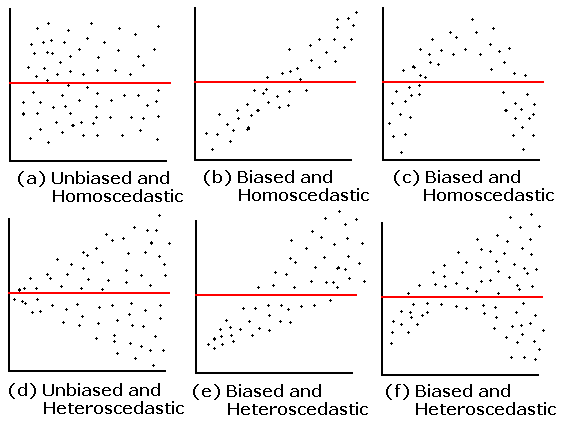)

### [Assessing the Model Assumptions](https://online.stat.psu.edu/stat462/node/146/)

We can use the same types of test as in the case of [simple linear regression](11.A.%20Simple%20Linear%20Regression.ipynb). Other tests include:

* [Test for Error Normality](https://online.stat.psu.edu/stat462/node/147/)
* [Tests for Constant Error Variance](https://online.stat.psu.edu/stat462/node/148/)
* Tests for Correlated Errors
    * [Durbin-Watson](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic)
    * [ARIMA or ARMA](http://www.statsref.com/HTML/index.html?arima.html)
    * Bivariate Plots or [Variance Inflation Factors](https://en.wikipedia.org/wiki/Variance_inflation_factor) (VIFs)
        * See [Example 4](Examples\Regression\multiple-regression.ipynb) for a [VIF example](https://etav.github.io/python/vif_factor_python.html).

##### Residual Analysis

The vertical distance between any one data point $y_i$ and its estimated value $\hat{y}_i$ is its observed **residual**.
$$e_i = y_i - \hat{y}_i$$

Each observed residual can be thought of as an estimate of the actual unknown "true error" term.
$$\varepsilon_i = Y_i - \mathrm{E}(Y_i)$$

The observed residuals should reflect the properties assumed for the unknown error terms. The basic idea of residual analysis is to investigate the observed residuals to see if they support the assumptions of linearity, independence, normality, and equal variances.

Here are a few plots that can support the analysis.
* [Residuals vs Fits Plot](https://online.stat.psu.edu/stat462/node/117/) or [Residuals vs Predictor Plot](https://online.stat.psu.edu/stat462/node/118/)
    * How does a non-linear regression function show up on a residual vs fits plot?
        * The residuals depart from $0$ in some *systematic manner*, such as being positive for small $x$ values, negative for medium $x$ values, and positive again for large $x$ values. Any systematic pattern is sufficient to suggest that the regression function is not linear.
    * How does non-constant error variance show up on a residual vs fits plot?
        * The plot has a "**fanning**" effect. That is, the residuals are close to $0$ for small $x$ values and are more spread out for large $x$ values.
        * The plot has a "**funneling**" effect. That is, the residuals are spread out for small $x$ values and close to $0$ for large $x$ values.
        * The spread of residuals varies in a systematic but complex fashion.
    * How does an outlier show up on a residuals vs fits plot?
        * The observation's residual stands apart from the basic random pattern of the rest of the residuals. The random pattern of the residual plot can even disappear of one outlier deviates significantly from the patter of the rest of the data.
* [Residuals vs Order Plot](https://online.stat.psu.edu/stat462/node/121/)
    * Appropriate if we know the order in which the data was collected.
* [Normal Probability Plot of Residuals](https://online.stat.psu.edu/stat462/node/122/)

### Summary

* Simple linear regression is about building a line that models the relationship between two quantitative variables.
* Correlation coefficients are a measure that can inform you about the strength and direction of a linear relationship.
* The most common way to visualize simple linear regression is using a scatterplot.
* A line is defined by an intercept and slope, which you found using the statsmodels library in Python.
* The intercept is the value of the response variable when the explanatory variable is set to $0$.
* The slope is the change in the response variable for one unit change in the explanatory variable.
* R-squared is the amount of variability in the response explained by the model.